# Importing packages

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Data Frame

In [5]:

# storing the data from the csv file to dataframe.

df= pd.read_csv('data.csv')

data = df

# Data validation

In [9]:
# Data Cleaning and Preparation

# Convert date columns to datetime format
data['booking_date'] = pd.to_datetime(data['booking_date'], format='%m/%d/%Y')
data['checkin_date'] = pd.to_datetime(data['checkin_date'], format='%m/%d/%Y')
data['checkout_date'] = pd.to_datetime(data['checkout_date'], format='%m/%d/%Y')

adr_usd                            object
hotel_id                           object
city_id                            object
star_rating                       float64
accommadation_type_name            object
chain_hotel                        object
booking_date               datetime64[ns]
checkin_date               datetime64[ns]
checkout_date              datetime64[ns]
dtype: object

In [10]:
# Check for missing values
missing_values = data.isnull().sum()

# Data type conversion and consistency check
data_types = data.dtypes

# Check for unique values in categorical columns to ensure consistency
unique_accommodation_types = data['accommadation_type_name'].unique()
unique_chain_hotel_status = data['chain_hotel'].unique()

missing_values, data_types, unique_accommodation_types, unique_chain_hotel_status

(adr_usd                    0
 hotel_id                   0
 city_id                    0
 star_rating                0
 accommadation_type_name    0
 chain_hotel                0
 booking_date               0
 checkin_date               0
 checkout_date              0
 dtype: int64,
 adr_usd                            object
 hotel_id                           object
 city_id                            object
 star_rating                       float64
 accommadation_type_name            object
 chain_hotel                        object
 booking_date               datetime64[ns]
 checkin_date               datetime64[ns]
 checkout_date              datetime64[ns]
 dtype: object,
 array(['Hotel', 'Serviced Apartment', 'Hostel',
        'Guest House / Bed & Breakfast', 'Motel', 'Apartment', 'Resort',
        'Ryokan', 'Resort Villa', 'Private Villa', 'Bungalow', 'Villa',
        'Holiday Park / Caravan Park', 'Capsule Hotel', 'Love Hotel',
        'Home'], dtype=object),
 array(['non-cha

In [11]:
# Data Type Conversion for adr_usd, hotel_id, and city_id

# Remove commas and convert to numeric types where appropriate
data['adr_usd'] = pd.to_numeric(data['adr_usd'].str.replace(',', ''), errors='coerce')
data['hotel_id'] = pd.to_numeric(data['hotel_id'].str.replace(',', ''), errors='coerce')
data['city_id'] = pd.to_numeric(data['city_id'].str.replace(',', ''), errors='coerce')

data.dtypes

adr_usd                           float64
hotel_id                            int64
city_id                             int64
star_rating                       float64
accommadation_type_name            object
chain_hotel                        object
booking_date               datetime64[ns]
checkin_date               datetime64[ns]
checkout_date              datetime64[ns]
dtype: object

In [12]:
data.isnull().sum()

adr_usd                    0
hotel_id                   0
city_id                    0
star_rating                0
accommadation_type_name    0
chain_hotel                0
booking_date               0
checkin_date               0
checkout_date              0
dtype: int64

# Analysis for Urgency Message

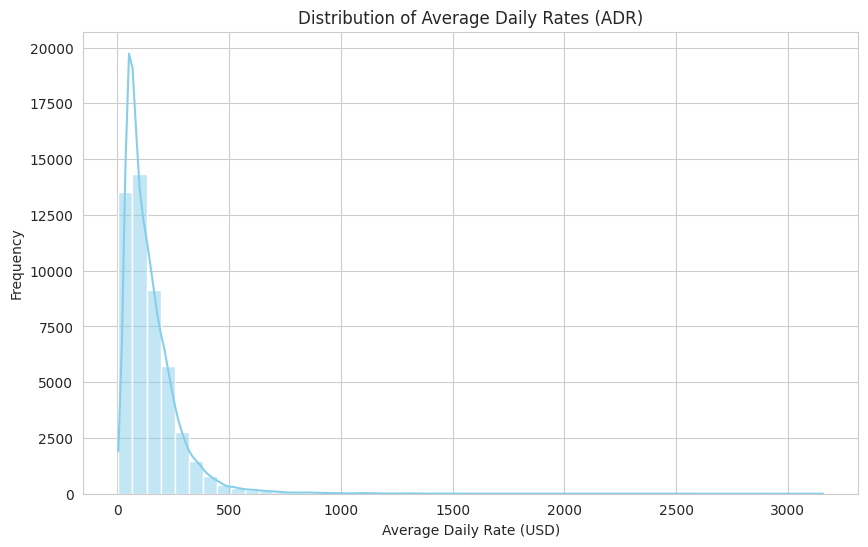

count    49064.000000
mean       148.089103
std        135.338549
min          4.260000
25%         62.555000
50%        113.660000
75%        192.220000
max       3156.860000
Name: adr_usd, dtype: float64

In [14]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of Average Daily Rates (ADR)
plt.figure(figsize=(10, 6))
sns.histplot(data['adr_usd'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Average Daily Rates (ADR)')
plt.xlabel('Average Daily Rate (USD)')
plt.ylabel('Frequency')
plt.show()

# Additionally, let's look at the summary statistics for the ADR
adr_summary = data['adr_usd'].describe()
adr_summary

#### The distribution of Average Daily Rates (ADR) shows a wide range of values, with the following key points from the summary statistics:

- The **mean ADR** is approximately 148.09, indicating the average price per room per night across all bookings in the dataset.
- The **standard deviation** is relatively high at 135.34, reflecting significant variability in room rates, possibly due to differences in hotel quality, location, and other factors.
- The **median (50th percentile) ADR** is 113.66, which is lower than the mean, suggesting a right-skewed distribution with some exceptionally high-value bookings pulling the mean upwards.
- The **minimum ADR** is 4.26, and the **maximum** is 3156.86, showing an extreme range of booking prices.


The histogram reveals that most bookings fall within a lower price range, with a long tail extending towards higher rates, indicative of a few luxury or high-priced accommodations. This distribution suggests that price sensitivity could vary significantly among customers, and urgency messaging might need to be tailored accordingly.

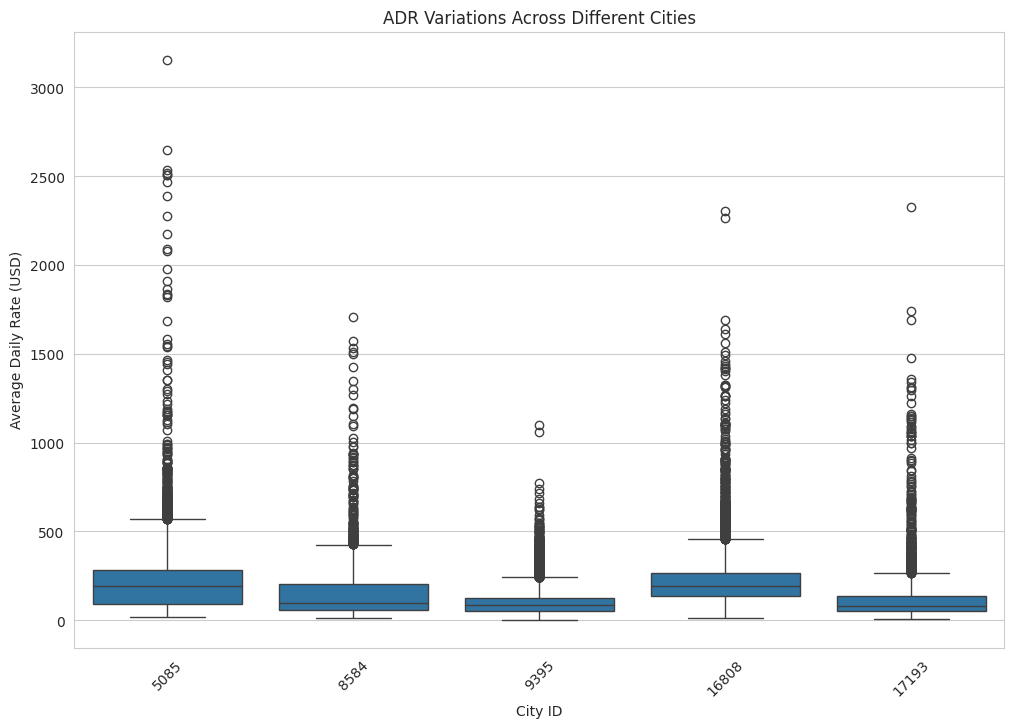

In [16]:
# Analyzing ADR variations across different cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='city_id', y='adr_usd', data=data)
plt.title('ADR Variations Across Different Cities')
plt.xlabel('City ID')
plt.ylabel('Average Daily Rate (USD)')
plt.xticks(rotation=45)
plt.show()

#### The visualizations provide insights into how the Average Daily Rate (ADR) varies across different cities:

ADR Variations Across Different Cities:

- The boxplot shows that there is a noticeable variation in ADR across different cities, indicating that location is a significant factor in pricing. Some cities have a higher median ADR, and the range of rates also varies widely, suggesting differences in market dynamics, demand, and the type of accommodations available in each city.

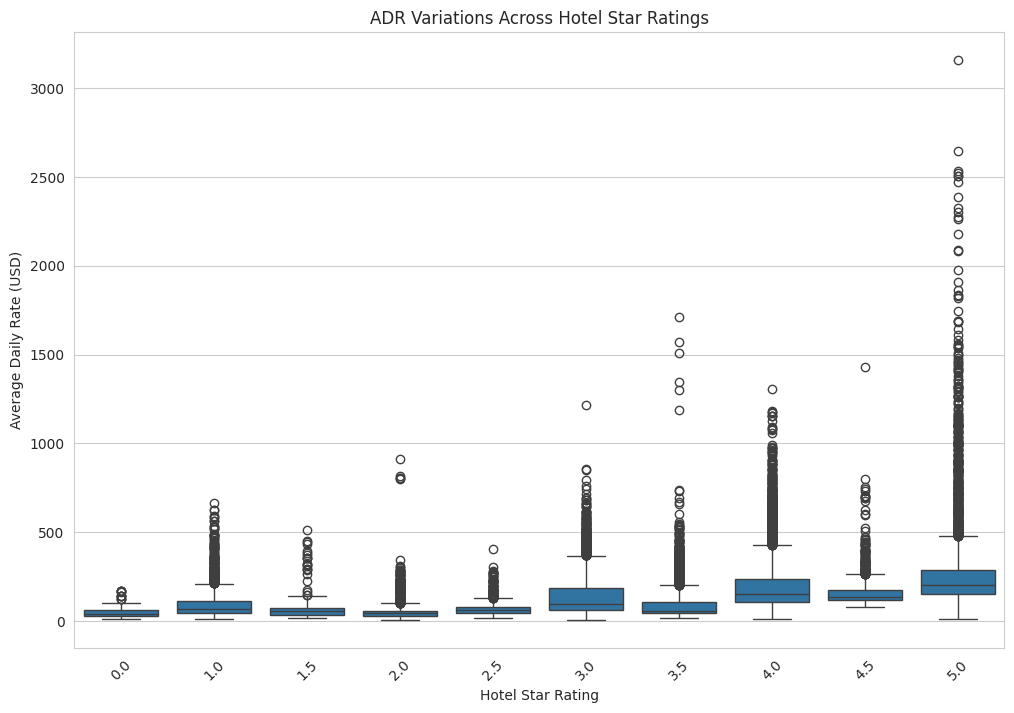

In [17]:
# Analyzing ADR variations across different hotel star ratings
plt.figure(figsize=(12, 8))
sns.boxplot(x='star_rating', y='adr_usd', data=data)
plt.title('ADR Variations Across Hotel Star Ratings')
plt.xlabel('Hotel Star Rating')
plt.ylabel('Average Daily Rate (USD)')
plt.xticks(rotation=45)
plt.show()

#### The visualizations provide insights into how the Average Daily Rate (ADR) varies across different hotel star ratings:

ADR Variations Across Hotel Star Ratings:

- As expected, there is a clear trend where higher star ratings are associated with higher ADRs. This reflects the quality and range of services provided by higher-rated hotels. The spread within each star rating category also indicates a variety of price points available to customers, possibly reflecting differences in specific hotel offerings, location within the city, and other amenities.

### These findings suggest that urgency messages could be tailored not only based on the time to check-in but also considering the city and the hotel's star rating. For example, in cities or for hotels with higher median rates and greater variability, urgency messages might emphasize securing a good deal or locking in a lower rate before prices increase. Conversely, for lower-rated hotels or cities with less variability, messages might focus more on availability or the benefits of booking now.

#### Next, let's examine how the ADR changes as the booking date approaches the check-in date to identify optimal timings for deploying urgency messages. This will involve calculating the time difference between booking and check-in dates and analyzing how ADR varies with this time difference.

/tmp/ipykernel_446606/2070266123.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='days_to_checkin', y='adr_usd', data=data, ci=None)


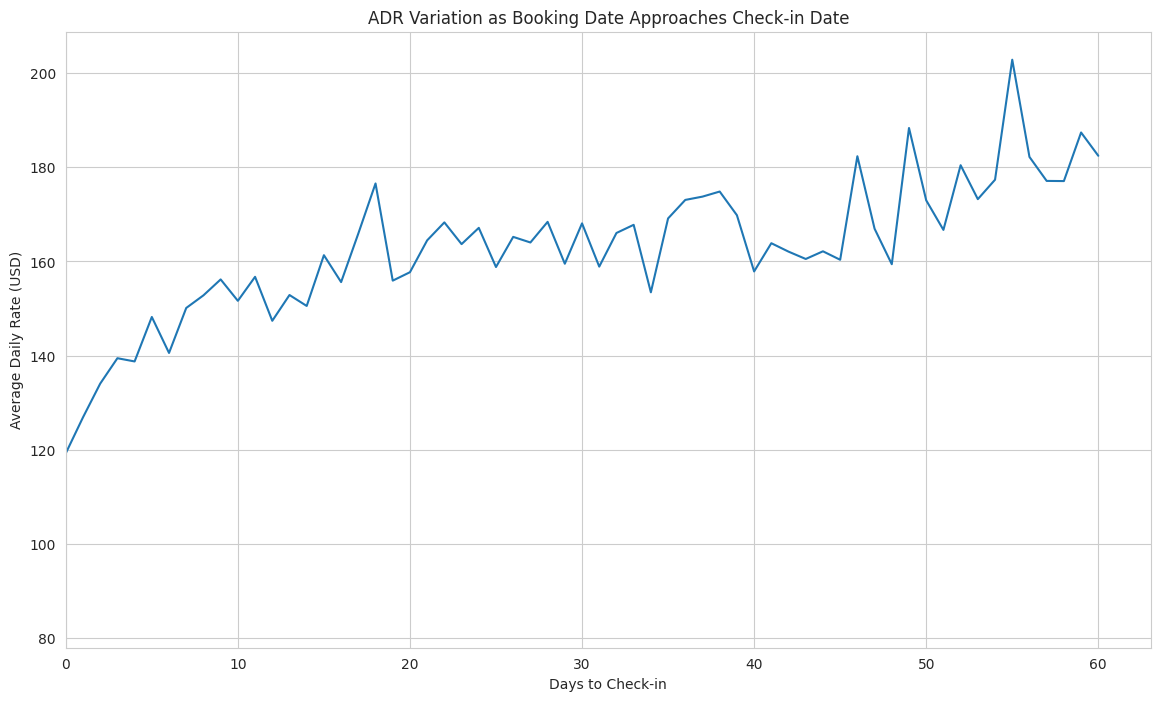

count    49064.000000
mean        14.529472
std         15.680648
min         -1.000000
25%          2.000000
50%          8.000000
75%         23.000000
max         60.000000
Name: days_to_checkin, dtype: float64

In [19]:
# Calculating the number of days between booking and check-in
data['days_to_checkin'] = (data['checkin_date'] - data['booking_date']).dt.days

# Analyzing how ADR changes as the booking date approaches the check-in date
plt.figure(figsize=(14, 8))
sns.lineplot(x='days_to_checkin', y='adr_usd', data=data, ci=None)
plt.title('ADR Variation as Booking Date Approaches Check-in Date')
plt.xlabel('Days to Check-in')
plt.ylabel('Average Daily Rate (USD)')
plt.xlim(left=0)  # To focus on the period leading up to check-in
plt.show()

# Summary statistics for 'days_to_checkin' to understand the booking window distribution
days_to_checkin_summary = data['days_to_checkin'].describe()
days_to_checkin_summary


#### The analysis of Average Daily Rate (ADR) variation as the booking date approaches the check-in date provides the following insights:

- The line plot indicates a general trend where the ADR tends to increase as the check-in date gets closer, especially in the final days leading up to check-in. This suggests that prices may rise as availability decreases, supporting the use of urgency messages to encourage earlier bookings.
- The summary statistics for days_to_checkin show that the **mean number of days between booking and check-in is approximately 14.5 days**, with a **standard deviation of about 15.7 days**. The distribution ranges from -1 (which may indicate same-day bookings or data entry errors) to 60 days, with **50% of bookings made 8 days or less before check-in**.


### Given these findings, urgency messages could be particularly effective in the following scenarios:

**Timing**: Implementing urgency messages as the check-in date approaches, especially in the last two weeks, could be effective. Messages could emphasize the potential for rising prices and decreasing availability to encourage immediate bookings.

**Customization by City and Star Rating**: Tailoring messages based on the city and hotel star rating, as different markets and hotel classes may exhibit distinct pricing dynamics.

**Placement in Booking Funnel**:

- On the homepage or search results page, messages could be generic, highlighting the benefits of booking early in general terms.
- At the property level, messages could be more specific, mentioning the recent price trends for that hotel or city.
- In the booking form, a more urgent message could highlight the immediate need to secure the current rate before it increases.

/tmp/ipykernel_446606/3947924884.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='days_to_checkin', y='accommadation_type_name', data=avg_days_to_checkin_by_type_sorted, palette='coolwarm')


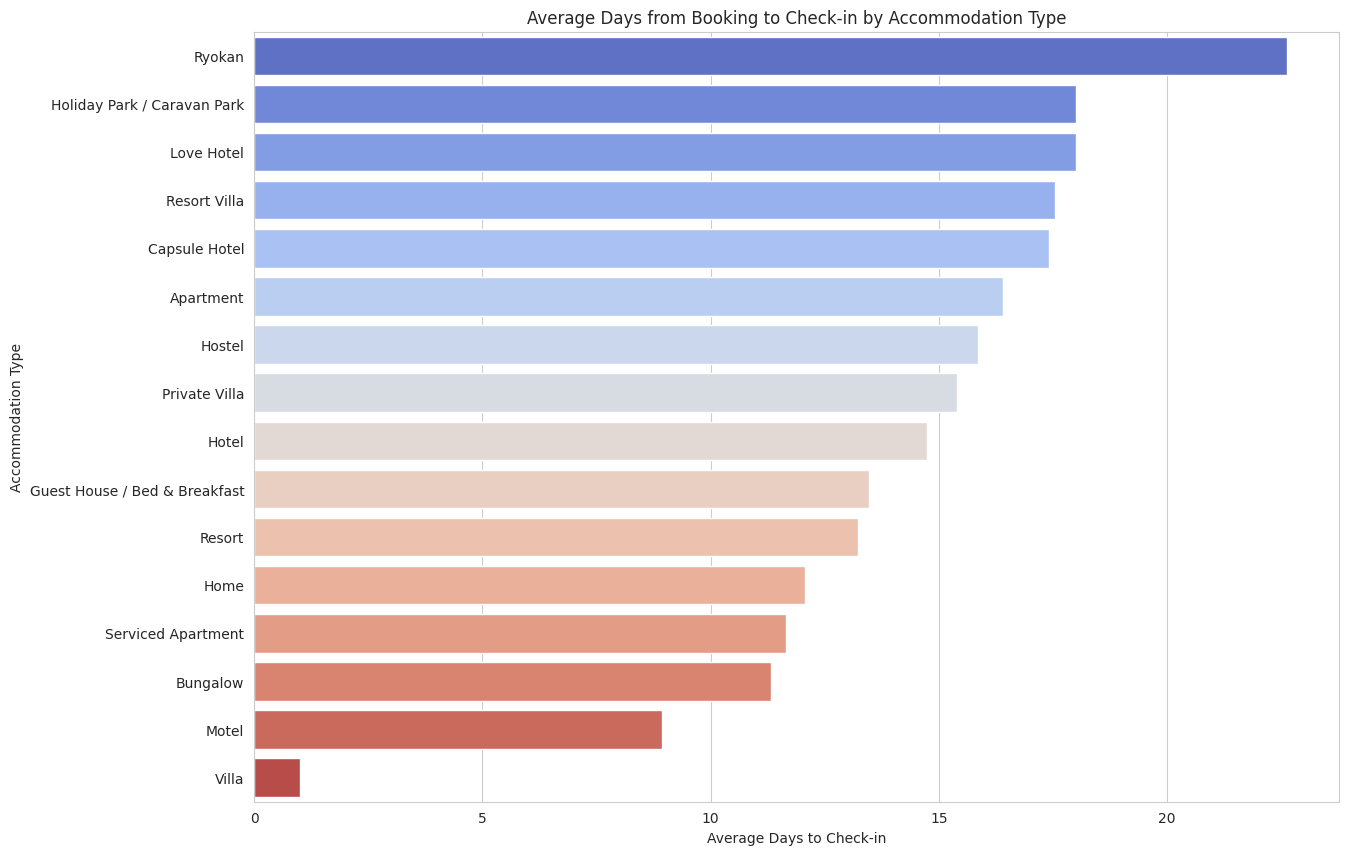

,accommadation_type_name,days_to_checkin
13,Ryokan,22.631068
4,Holiday Park / Caravan Park,18.000000
8,Love Hotel,18.000000
12,Resort Villa,17.551637
2,Capsule Hotel,17.407543
0,Apartment,16.410042
6,Hostel,15.845710
10,Private Villa,15.388889
7,Hotel,14.747383
3,Guest House / Bed & Breakfast,13.472806


In [20]:
# Grouping data by accommodation type and calculating the average 'days_to_checkin' for each type
avg_days_to_checkin_by_type = data.groupby('accommadation_type_name')['days_to_checkin'].mean().reset_index()

# Sorting the results for better visualization
avg_days_to_checkin_by_type_sorted = avg_days_to_checkin_by_type.sort_values(by='days_to_checkin', ascending=False)

# Plotting the average check-in to booking date difference for each accommodation type
plt.figure(figsize=(14, 10))
sns.barplot(x='days_to_checkin', y='accommadation_type_name', data=avg_days_to_checkin_by_type_sorted, palette='coolwarm')
plt.title('Average Days from Booking to Check-in by Accommodation Type')
plt.xlabel('Average Days to Check-in')
plt.ylabel('Accommodation Type')
plt.show()

avg_days_to_checkin_by_type_sorted


#### The bar plot illustrating the average days from booking to check-in by accommodation type reveals varying booking behaviors across different types of accommodations:

1. Ryokans have the highest average booking lead time, with approximately 22.6 days from booking to check-in. This could be due to the traditional and often sought-after nature of such accommodations, especially in specific cultural contexts like Japan.

2. Holiday Parks/Caravan Parks, Love Hotels, and Resort Villas also show relatively long lead times, indicating that these types of accommodations might be planned well in advance, possibly due to their unique offerings or seasonal demand.

3. On the other end of the spectrum, Villas show a very short average lead time of just 1 day, which could be due to specific booking practices for such properties or data anomalies. Motels also have a shorter lead time, suggesting more last-minute bookings, potentially by travelers on the road.



### Based on these insights, different types of urgency messages could be tailored for each accommodation type:

**Ryokans and Resort Villas**: Given the longer lead times, urgency messages could focus on the exclusivity and limited availability of such unique experiences. For example, "Secure your authentic experience now! Ryokan bookings fill up fast."

**Holiday Parks/Caravan Parks and Love Hotels**: Messages could emphasize the benefits of planning ahead to enjoy these unique stays, such as "Book your perfect getaway early to ensure your spot in paradise."

**Hotels and Serviced Apartments**: With moderate lead times, messages might highlight the competitive nature of such bookings, like "Don’t miss out on your ideal stay! Prices might increase as your dates approach."

**Hostels**: Given their appeal to budget and solo travelers, urgency messages could focus on securing the best rates or availability, such as "Lock in your bed now before it's too late! Great rates for solo travelers."

**Motels**: With shorter booking lead times, messages could play on the immediacy, such as "Need a room tonight? Book now to secure your last-minute stay!"

**Villas**: Considering the extremely short lead time, if not due to data anomalies, the message could be very immediate, like "Last chance for an exclusive villa stay! Book your luxury escape now."



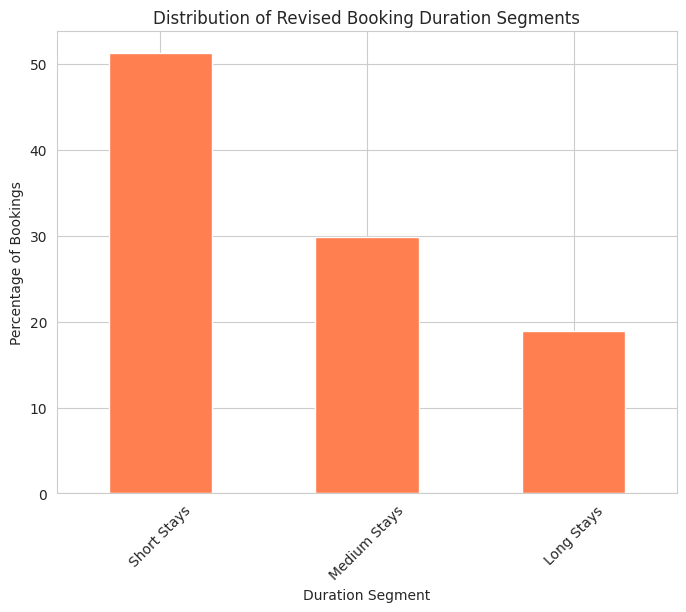

Short Stays     51.241236
Medium Stays    29.889532
Long Stays      18.869232
Name: revised_duration_segment, dtype: float64

In [23]:
# Calculating booking duration as the difference between check-out and check-in dates
data['booking_duration'] = (data['checkout_date'] - data['checkin_date']).dt.days

# Redefining the segments for booking duration based on the updated criteria
def revised_segment_duration(days):
    if days == 1:
        return 'Short Stays'
    elif days == 2:
        return 'Medium Stays'
    else:
        return 'Long Stays'

# Applying the revised segmentation function to the booking duration
data['revised_duration_segment'] = data['booking_duration'].apply(revised_segment_duration)

# Analyzing the distribution of the revised booking duration segments
revised_duration_segment_distribution = data['revised_duration_segment'].value_counts(normalize=True) * 100

# Plotting the distribution of the revised booking duration segments
plt.figure(figsize=(8, 6))
revised_duration_segment_distribution.plot(kind='bar', color='coral')
plt.title('Distribution of Revised Booking Duration Segments')
plt.xlabel('Duration Segment')
plt.ylabel('Percentage of Bookings')
plt.xticks(rotation=45)
plt.show()

revised_duration_segment_distribution


#### The re-segmentation of booking durations based on the updated criteria shows the following distribution among the revised segments:

- **Short Stays (1 night)** constitute approximately 51.24% of bookings.
- **Medium Stays (2 nights)** account for about 29.89% of bookings.
- **Long Stays (3 nights or more)** make up around 18.87% of bookings.

With this segmentation, we can now suggest urgency messages tailored to each segment:

### Urgency Messages for Each Revised Segment:

1. **Short Stays (1 night)**:
- **Message**: "Snap up your perfect room for a night! Last-minute deals await."
- **Rationale**: For single-night stays, emphasize the appeal of last-minute deals and the ease of making a quick decision.

2. **Medium Stays (2 nights)**:
- **Message**: "Double the fun with a 2-night stay! Book now to secure your spot."
- **Rationale**: Highlight the benefit of a weekend or two-day escape, suggesting a balance between spontaneity and a brief getaway.

4. **Long Stays (3 nights or more)**:
- **Message**: "Extend your adventure! Exclusive offers for stays 3 nights and over."
- **Rationale**: For longer stays, emphasize the value and exclusivity of offers available for extended bookings, encouraging guests to take advantage of a longer break.
